In [1]:
!pip install soundfile simpleaudio librosa scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for simpleaudio
  Running setup.py clean for simpleaudio
Failed to build simpleaudio
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (simpleaudio)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa


In [3]:
file_path = "/content/LJ037-0171.wav"

signal, sample_rate = sf.read(file_path)

num_samples = len(signal)
duration = num_samples / sample_rate

print("Sample Rate (Hz):", sample_rate)
print("Number of Samples:", num_samples)
print("Total Duration (seconds):", duration)


Sample Rate (Hz): 22050
Number of Samples: 167226
Total Duration (seconds): 7.583945578231292


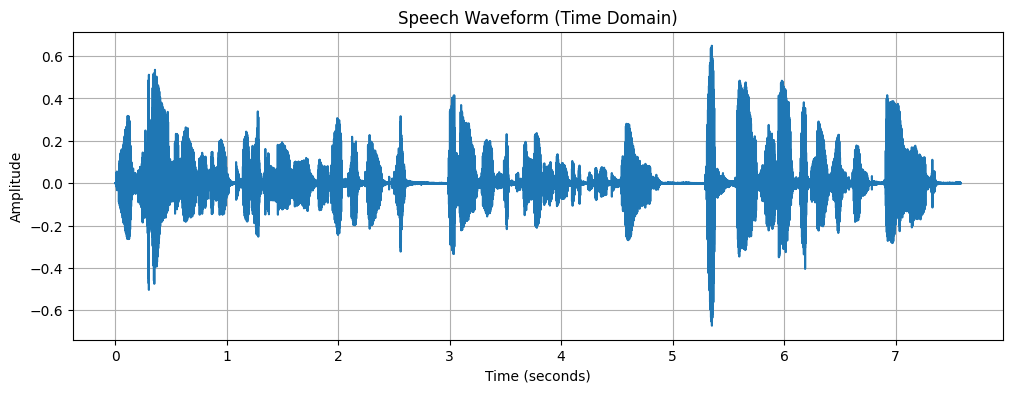

In [4]:
time = np.arange(num_samples) / sample_rate

plt.figure(figsize=(12,4))
plt.plot(time, signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Speech Waveform (Time Domain)")
plt.grid()
plt.show()


In [5]:
energy = signal ** 2
threshold = 0.01 * np.max(energy)

active_samples = energy > threshold
active_duration = np.sum(active_samples) / sample_rate

print("Active Speech Duration (seconds):", active_duration)


Active Speech Duration (seconds): 1.3397278911564625


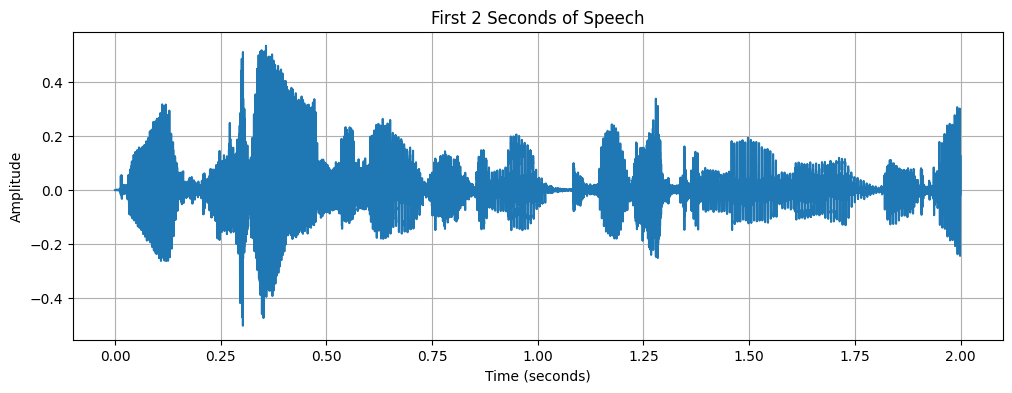

In [6]:
slice_samples = int(2 * sample_rate)
sliced_signal = signal[:slice_samples]

slice_time = np.arange(len(sliced_signal)) / sample_rate

plt.figure(figsize=(12,4))
plt.plot(slice_time, sliced_signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("First 2 Seconds of Speech")
plt.grid()
plt.show()


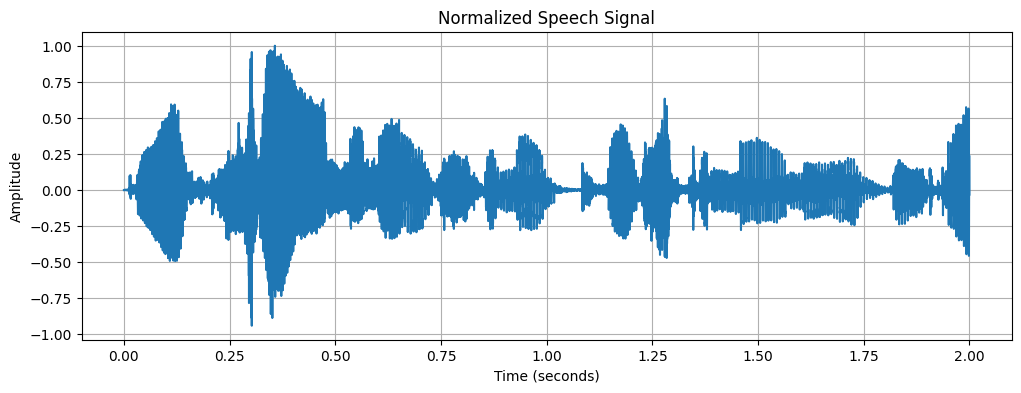

In [7]:
normalized_signal = sliced_signal / np.max(np.abs(sliced_signal))

plt.figure(figsize=(12,4))
plt.plot(slice_time, normalized_signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Normalized Speech Signal")
plt.grid()
plt.show()


In [9]:
amplified_signal = signal * 2
deamplified_signal = signal * 0.5


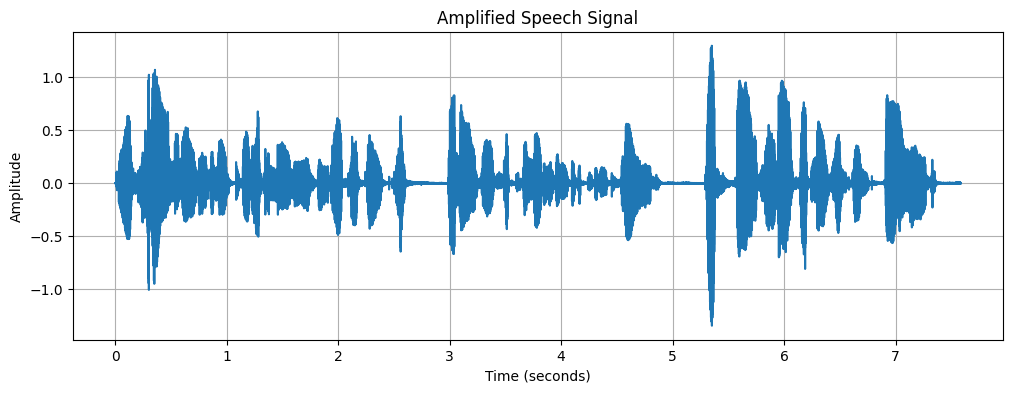

In [10]:
plt.figure(figsize=(12,4))
plt.plot(time, amplified_signal)
plt.title("Amplified Speech Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


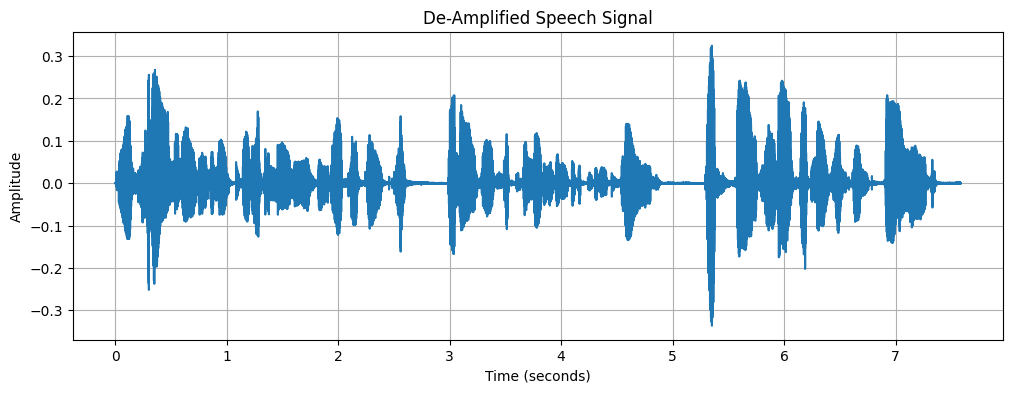

In [11]:
plt.figure(figsize=(12,4))
plt.plot(time, deamplified_signal)
plt.title("De-Amplified Speech Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


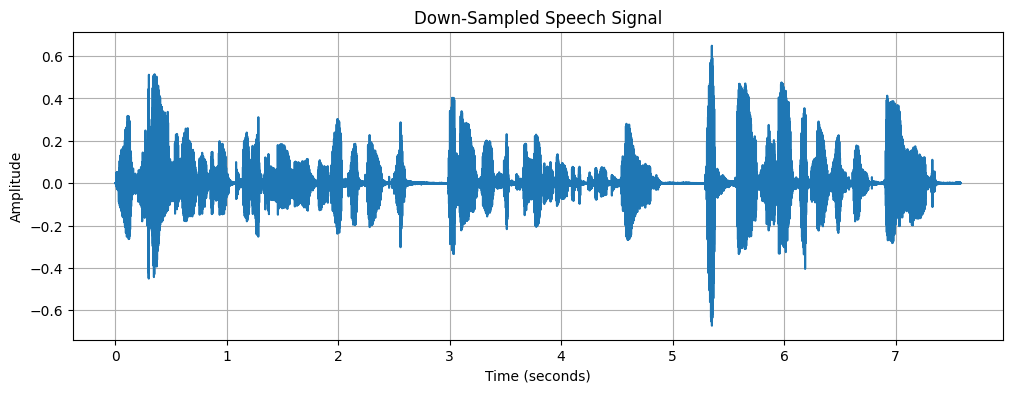

In [12]:
downsampled_signal = signal[::2]
down_time = np.arange(len(downsampled_signal)) / (sample_rate / 2)

plt.figure(figsize=(12,4))
plt.plot(down_time, downsampled_signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Down-Sampled Speech Signal")
plt.grid()
plt.show()


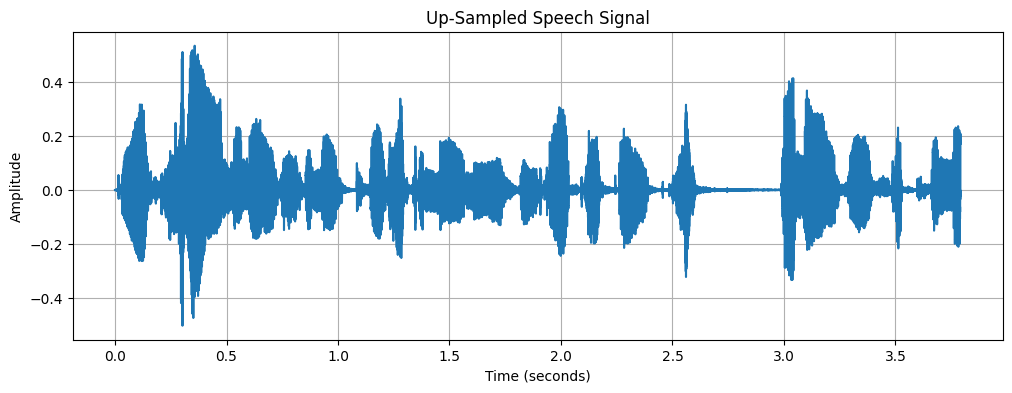

In [13]:
upsampled_signal = np.repeat(signal, 2)
up_time = np.arange(len(upsampled_signal)) / (sample_rate * 2)

plt.figure(figsize=(12,4))
plt.plot(up_time[:len(time)], upsampled_signal[:len(time)])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Up-Sampled Speech Signal")
plt.grid()
plt.show()


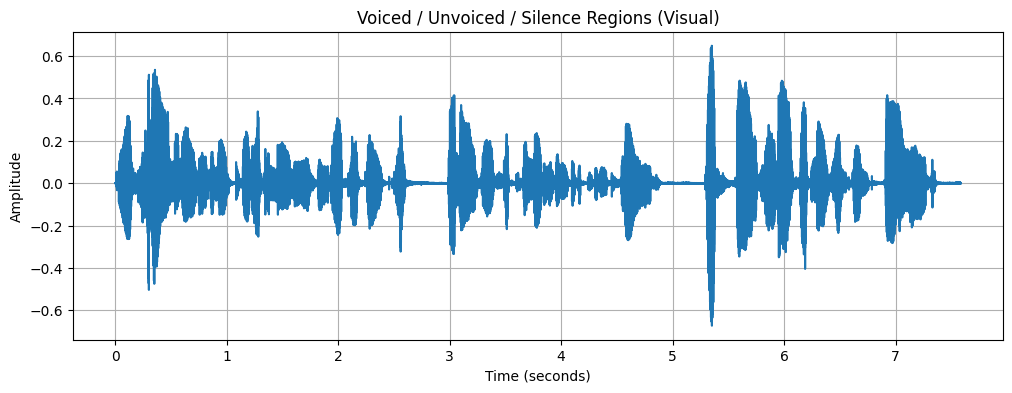

In [14]:
plt.figure(figsize=(12,4))
plt.plot(time, signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Voiced / Unvoiced / Silence Regions (Visual)")
plt.grid()
plt.show()
